In [137]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [138]:
ATTACK_TARGET = "12"
TARGET_TYPE = "SUB" # MAIN: メインの攻撃, SUB: 予備選の攻撃, UTIL100: Utility100の攻撃
# MAIN = False # True: メインの攻撃, False: 予備選の攻撃

DIR = ""
if TARGET_TYPE == "MAIN":
    DIR = "../data"
elif TARGET_TYPE == "SUB":
    DIR = "../predata/anonymization_data"
elif TARGET_TYPE == "UTIL100":
    DIR = "../samples/util100"
    ATTACK_TARGET = "36"

"""
01	宮地研.exe
02	私達日本語本当下手
03	ポップコーン
04	Hots
05	SHA-NES
06	神ぼ大νττ
07	たけのこ映画守り隊
08	0xA
09	ステテコ泥棒
10	動的計画法
11	Gunmataro117
12	HAL
14	privocy
15	ES5 →多数決で陥落？
16	佐古研究室
17	こそっとアタック、しれっとブロック
18	匿名アノニマス
19	RITCHEY
20	KAT-TUNE
21	PR.AVATECT
22	春日部防衛隊（かすかべ防衛隊）
"""

'\n01\t宮地研.exe\n02\t私達日本語本当下手\n03\tポップコーン\n04\tHots\n05\tSHA-NES\n06\t神ぼ大νττ\n07\tたけのこ映画守り隊\n08\t0xA\n09\tステテコ泥棒\n10\t動的計画法\n11\tGunmataro117\n12\tHAL\n14\tprivocy\n15\tES5 →多数決で陥落？\n16\t佐古研究室\n17\tこそっとアタック、しれっとブロック\n18\t匿名アノニマス\n19\tRITCHEY\n20\tKAT-TUNE\n21\tPR.AVATECT\n22\t春日部防衛隊（かすかべ防衛隊）\n'

In [139]:
# fmt: off
ALL_HEADER = ['Name', 'Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '247', '260', '653', '673', '810', '885',  # noqa: E501
                      '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017',  # noqa: E501
                      '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253',  # noqa: E501
                      '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489',  # noqa: E501
                      '3877', '3889'] # noqa

B_HEADERS_LIST = [
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '653', '1525', '2105', '2193', '2253', '2628', '2872', '3438', '3439', '3440', '3877', '3889'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '1881', '1920', '2087', '2138'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '673', '810', '885', '1009', '1073', '1097', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2043', '2087', '2093', '2138', '2399', '3438', '3439', '3440'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '810', '1073', '1126', '1702', '2100', '2174', '2253', '2797', '3393', '3466'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '885', '1097', '1654', '2086', '2138', '2872'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '2100', '2143', '2872', '3479'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '1750', '2021', '2093', '2105', '2628', '2968'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '1920', '2017', '2087'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '2628', '2174', '2797', '1073', '2100', '2968', '2105', '2193'],  # noqa: E501
]

B_USER_ATTRIBUTE_HEADERS = ['Gender', 'Age', 'Occupation', 'ZIP-code']

B_REVIEW_HEADERS_LIST = [
  ['260', '653', '1525', '2105', '2193', '2253', '2628', '2872', '3438', '3439', '3440', '3877', '3889'],  # noqa: E501
  ['2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889'],  # noqa: E501
  ['673', '1881', '1920', '2087', '2138'],  # noqa: E501
  ['2', '56', '673', '810', '885', '1009', '1073', '1097', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2043', '2087', '2093', '2138', '2399', '3438', '3439', '3440'],  # noqa: E501
  ['673', '810', '1073', '1126', '1702', '2100', '2174', '2253', '2797', '3393', '3466'],  # noqa: E501
  ['247', '885', '1097', '1654', '2086', '2138', '2872'],  # noqa: E501
  ['247', '2100', '2143', '2872', '3479'],  # noqa: E501
  ['260', '1097', '1750', '2021', '2093', '2105', '2628', '2968'],  # noqa: E501
  ['247', '1920', '2017', '2087'],  # noqa: E501
  ['260', '1097', '2628', '2174', '2797', '1073', '2100', '2968', '2105', '2193'],  # noqa: E501
]

MOVIE_IDS = ['2', '56', '247', '260', '653', '673', '810', '885', '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253', '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489', '3877', '3889']
# fmt: on

### Cデータの読み取り

In [140]:
from os import listdir

#c0~c9に対するdfのリスト
c_data_list = []

files = listdir(DIR)

for i in range(10):
    file = None
    for f in files:
        if f.startswith(f"C{ATTACK_TARGET}_{i}"):
            file = f
            break
    if file is None:
        print(f)
        raise("File not found")
    c_data = pd.read_csv(f"{DIR}/C{ATTACK_TARGET}_{i}.csv")
    c_data_list.append(c_data)

c_data_list[0]

,Gender,Age,Occupation,ZIP-code,260,653,1525,2105,2193,2253,2628,2872,3438,3439,3440,3877,3889
0,M,18,0,322,4,2,0,4,4,5,5,0,0,2,0,2,2
1,M,18,9,103,1,0,0,4,0,5,3,1,4,1,2,1,3
2,F,35,4,181,5,0,1,5,0,2,2,1,3,3,5,0,4
3,M,56,4,459,4,4,2,2,4,1,4,2,4,3,2,1,4
4,F,1,2,652,3,1,0,3,3,5,4,4,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,35,12,652,5,0,0,4,3,0,3,5,0,0,0,0,1
9996,F,50,10,380,5,4,1,2,5,0,0,2,5,0,5,1,1
9997,M,25,16,495,1,1,0,2,0,4,3,3,5,0,3,0,1
9998,F,50,10,943,4,4,3,0,1,1,0,4,3,2,5,0,0


### Ba, Bbの読み込み

In [141]:
Ba = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}a.csv")
Ba.head()

,Name,Gender,Age,Occupation,ZIP-code
0,Etienne Lovell,M,25,7,957
1,Julius Felipe,M,1,10,778
2,Jayne Winckle,F,50,18,772
3,Gaylor Spread,M,18,13,666
4,Jennifer Corse,F,25,4,197


In [142]:
Bb = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}b.csv")
Bb.head()

,2,56,247,260,653,673,810,885,1009,1073,...,2968,3393,3438,3439,3440,3466,3479,3489,3877,3889
0,5,1,0,2,1,1,4,1,2,4,...,5,0,0,2,0,4,0,3,3,1
1,1,0,5,5,0,2,0,2,2,1,...,0,5,1,5,5,4,2,0,1,5
2,3,0,0,1,2,1,1,5,1,1,...,2,0,3,5,0,4,4,3,1,5
3,2,0,0,4,5,4,0,5,4,1,...,*,5,5,1,5,5,2,2,5,0
4,0,0,0,5,4,0,0,2,0,5,...,2,0,4,0,2,0,0,2,3,0


### 攻撃に利用するGAOZと映画のIDの全ペア

In [143]:
import itertools

cross_tab_pairs = []

pairs_set = set()
for b_review_headers in B_REVIEW_HEADERS_LIST:
    for pair in itertools.combinations(b_review_headers, 2):
        pairs_set.add(pair)

for pair in itertools.combinations(MOVIE_IDS, 2):
    if pair in pairs_set:
        cross_tab_pairs.append(pair)

print(f"ペアの数: {len(cross_tab_pairs)}")
cross_tab_pairs[:5]

ペアの数: 607


[('2', '56'), ('2', '260'), ('2', '653'), ('2', '673'), ('2', '810')]

### C0~C9の各cross集計の平均をとる

In [144]:
# 1. c0からc9までのデータを結合
combined_data = pd.concat(c_data_list, ignore_index=True)
combined_data.astype("category")
for col in MOVIE_IDS:
    combined_data[col] = pd.Categorical(combined_data[col], categories=[0, 1, 2, 3, 4, 5], ordered=True)


# 2. cross_tab_pairsごとにクロス集計を行う
cross_tabs = {}
for movie_id_i, movie_id_j in cross_tab_pairs:
    cross_tab = pd.crosstab(combined_data[movie_id_i], combined_data[movie_id_j], normalize='all')
    cross_tabs[(movie_id_i, movie_id_j)] = cross_tab

cross_tabs[("260", "2174")]

2174,0,1,2,3,4,5
260,,,,,,
0,0.0194,0.0124,0.0125,0.0170,0.0198,0.0104
1,0.0285,0.0159,0.0187,0.0209,0.0283,0.0174
2,0.0201,0.0126,0.0165,0.0177,0.0197,0.0123
3,0.0320,0.0215,0.0286,0.0282,0.0297,0.0201
4,0.0326,0.0212,0.0242,0.0291,0.0338,0.0180
5,0.0749,0.0528,0.0550,0.0620,0.0726,0.0436


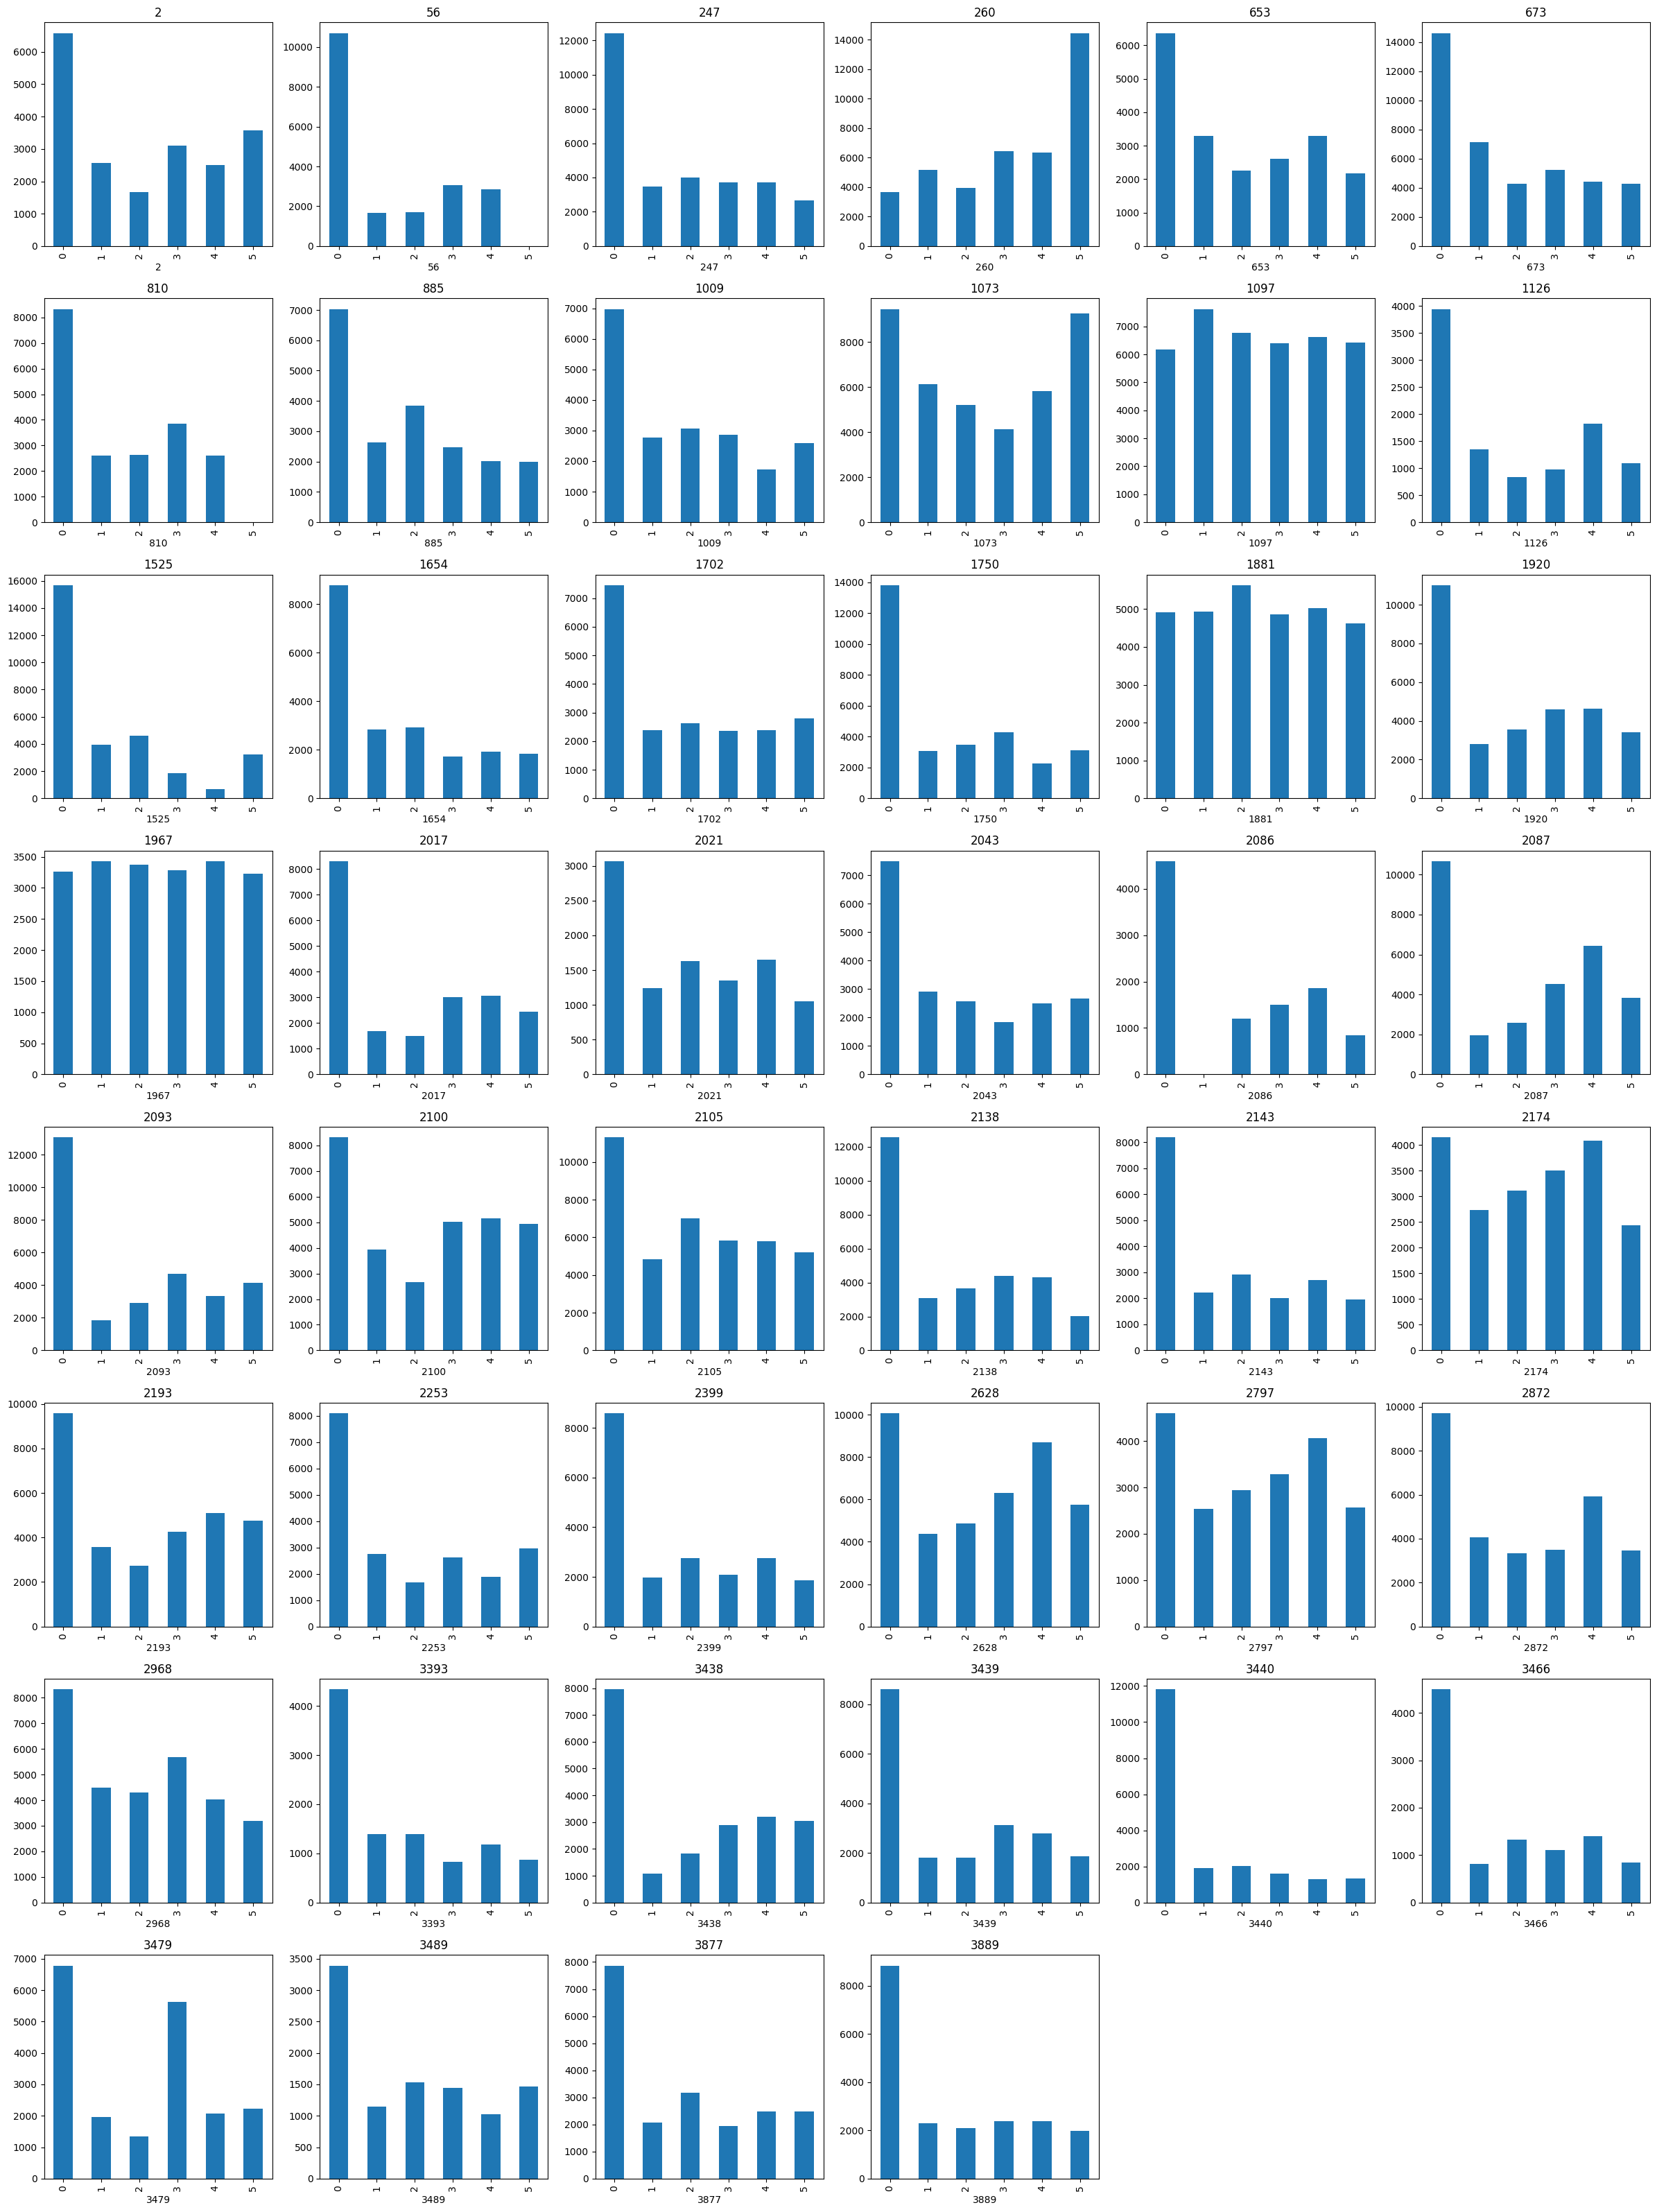

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# combined_dataが既に定義されていると仮定します

# カラムの総数を取得
num_cols = len(MOVIE_IDS)
# 列数を6に設定
num_per_row = 6
# 必要な行数を計算
num_rows = int(np.ceil(num_cols / num_per_row))

# サブプロットを作成
fig, axes = plt.subplots(nrows=num_rows, ncols=num_per_row, figsize=(24, num_rows * 4))
axes = axes.flatten()

# # 各カラムに対して棒グラフを描画
for i, col in enumerate(MOVIE_IDS):
    value_counts = combined_data[col].value_counts().sort_index()
    value_counts.plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)

# 余ったサブプロットを削除
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 正規のMAE ATTACK

In [146]:
# target_Bb_row_index = 0

result_list = []

for target_Bb_row_index in range(50):
    target_Bb_row = Bb.iloc[target_Bb_row_index]

    hidden_movie_id = None
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] == "*":
            hidden_movie_id = movie_id
            break

    # TODO:　ここの実装が複雑なので後ほど問題ないか確認する
    # 各映画IDに対する target_cross を格納するリスト
    cross_tabs_with_hidden_movie = []

    for movie_id_i, movie_id_j in cross_tab_pairs:
        if hidden_movie_id not in (movie_id_i, movie_id_j):
            continue
        cross_tab = cross_tabs[(movie_id_i, movie_id_j)]
        paired_movie_id = None
        if hidden_movie_id == movie_id_i:
            paired_movie_id = movie_id_j
            # 転置する
            cross_tab = cross_tab.T
        else:
            paired_movie_id = movie_id_i
        # 2143       0       1       2       3       4       5
        # 2                                                   
        # 0     0.1678  0.0290  0.0415  0.0272  0.0413  0.0268
        # 1     0.0406  0.0176  0.0188  0.0116  0.0204  0.0140
        # 2     0.0215  0.0102  0.0126  0.0108  0.0154  0.0095
        # 3     0.0546  0.0173  0.0233  0.0163  0.0236  0.0183
        # 4     0.0477  0.0163  0.0201  0.0161  0.0201  0.0164
        # 5     0.0696  0.0184  0.0243  0.0195  0.0240  0.0175
        review_value = target_Bb_row[paired_movie_id]

        column_sums = cross_tab.sum()
        # 正規化係数を計算（目標値 1/6 を各列の合計で割る）
        normalization_factors = (1/6) / column_sums
        # データフレームの各値に正規化係数を適用
        normalized_cross_tab = cross_tab * normalization_factors
        # print(cross_tab)
        # print(review_value)
        target_cross_tab = normalized_cross_tab.loc[int(review_value)]
        # print(target_cross_tab)
        cross_tabs_with_hidden_movie.append(target_cross_tab)

    cross_tabs_with_hidden_movie = pd.concat(cross_tabs_with_hidden_movie, axis=1)

    # 各カラムごとに総和が1になるように確率を正規化
    def normalize_columns(df):
        return df.div(df.sum(axis=0), axis=1)

    # クロス集計表を列ごとに正規化
    normalized_cross_tabs_with_hidden_movie = normalize_columns(cross_tabs_with_hidden_movie)
    normalized_cross_tabs_with_hidden_movie

    # hidden_movie_probabilities = normalized_cross_tabs_with_hidden_movie.sum(axis=1)
    # hidden_movie_histgram = combined_data[hidden_movie_id].value_counts(normalize=True).sort_index()
    # probability = (hidden_movie_probabilities / hidden_movie_histgram).sort_values(ascending=False)
    hidden_movie_probabilities = normalized_cross_tabs_with_hidden_movie.mean(axis=1)
    # hidden_movie_histgram = combined_data[hidden_movie_id].value_counts(normalize=True).sort_index()
    # probability = (hidden_movie_probabilities / hidden_movie_histgram).sort_values(ascending=False)
    result_list.append(hidden_movie_probabilities.sort_values(ascending=False).index[0])

result_list = pd.Series(result_list).values
result_list

array([5, 1, 2, 2, 0, 3, 5, 0, 0, 0, 0, 2, 4, 3, 2, 0, 0, 1, 2, 1, 1, 0,
       4, 0, 0, 5, 4, 4, 0, 2, 2, 4, 4, 0, 2, 0, 3, 2, 5, 5, 3, 4, 5, 3,
       4, 0, 1, 2, 0, 4])

In [147]:
# results_df["Predicted_Rating"]

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

my_answer = list(result_list)

if TARGET_TYPE == "SUB" or TARGET_TYPE == "UTIL100":
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values

    print(X_ANSWER)
    print(my_answer)

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / 50")

[0 2 3 2 1 3 0 0 3 4 0 0 4 0 4 0 0 1 3 3 1 4 4 4 4 4 0 0 0 5 2 5 3 0 2 3 3
 5 4 5 3 3 4 1 4 4 0 2 0 2]
[5, 1, 2, 2, 0, 3, 5, 0, 0, 0, 0, 2, 4, 3, 2, 0, 0, 1, 2, 1, 1, 0, 4, 0, 0, 5, 4, 4, 0, 2, 2, 4, 4, 0, 2, 0, 3, 2, 5, 5, 3, 4, 5, 3, 4, 0, 1, 2, 0, 4]


マッチングの成功率: <span style='color:yellow'>20</span> / 50

In [148]:
count_0 = my_answer.count(0)

printmd(f"0の数: <span style='color:green'>{count_0}</span>")
if count_0 >= 30:
    printmd(f"🚨 <span style='color:yellow'>0が30以上です</span>")

0の数: <span style='color:green'>15</span>

## MAE ATTACK + ゴミ方式

In [149]:
MAX_0_COUNT = 28

answer_df = pd.DataFrame(index=range(50), columns=["Answer", "0_Prob", "NoCondition0", "MaxOther0"])

prob_0 = []
max_other_0 = []

for target_Bb_row_index in range(50):
    target_Bb_row = Bb.iloc[target_Bb_row_index]

    hidden_movie_id = None
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] == "*":
            hidden_movie_id = movie_id
            break

    # TODO:　ここの実装が複雑なので後ほど問題ないか確認する
    # 各映画IDに対する target_cross を格納するリスト
    cross_tabs_with_hidden_movie = []

    for movie_id_i, movie_id_j in cross_tab_pairs:
        if hidden_movie_id not in (movie_id_i, movie_id_j):
            continue
        cross_tab = cross_tabs[(movie_id_i, movie_id_j)]
        paired_movie_id = None
        if hidden_movie_id == movie_id_i:
            paired_movie_id = movie_id_j
            # 転置する
            cross_tab = cross_tab.T
        else:
            paired_movie_id = movie_id_i
        # 2143       0       1       2       3       4       5
        # 2                                                   
        # 0     0.1678  0.0290  0.0415  0.0272  0.0413  0.0268
        # 1     0.0406  0.0176  0.0188  0.0116  0.0204  0.0140
        # 2     0.0215  0.0102  0.0126  0.0108  0.0154  0.0095
        # 3     0.0546  0.0173  0.0233  0.0163  0.0236  0.0183
        # 4     0.0477  0.0163  0.0201  0.0161  0.0201  0.0164
        # 5     0.0696  0.0184  0.0243  0.0195  0.0240  0.0175
        review_value = target_Bb_row[paired_movie_id]

        column_sums = cross_tab.sum()
        # 正規化係数を計算（目標値 1/6 を各列の合計で割る）
        normalization_factors = (1/6) / column_sums
        # データフレームの各値に正規化係数を適用
        normalized_cross_tab = cross_tab * normalization_factors
        # print(cross_tab)
        # print(review_value)
        target_cross_tab = normalized_cross_tab.loc[int(review_value)]
        # print(target_cross_tab)
        cross_tabs_with_hidden_movie.append(target_cross_tab)

    cross_tabs_with_hidden_movie = pd.concat(cross_tabs_with_hidden_movie, axis=1)

    # 各カラムごとに総和が1になるように確率を正規化
    def normalize_columns(df):
        return df.div(df.sum(axis=0), axis=1)

    # クロス集計表を列ごとに正規化
    normalized_cross_tabs_with_hidden_movie = normalize_columns(cross_tabs_with_hidden_movie)
    normalized_cross_tabs_with_hidden_movie

    hidden_movie_probabilities = normalized_cross_tabs_with_hidden_movie.mean(axis=1)
    
    prob_0.append(hidden_movie_probabilities[0])

    max_other_index = hidden_movie_probabilities.iloc[1:].idxmax()
    max_other_0.append(max_other_index)

answer_df["0_Prob"] = prob_0
answer_df["MaxOther0"] = max_other_0
# 0_Probの上位MAX_0_COUNTを求める
top_0_probs = answer_df.nlargest(MAX_0_COUNT, "0_Prob")
# NoCondition0を設定
answer_df["NoCondition0"] = False
answer_df.loc[top_0_probs.index, "NoCondition0"] = True

# Answerを決定
answer_df["Answer"] = np.where(answer_df["NoCondition0"], 0, answer_df["MaxOther0"])


result_list = answer_df["Answer"].values
result_list

array([5, 0, 2, 2, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1, 0,
       4, 0, 0, 5, 0, 0, 0, 2, 0, 4, 0, 0, 2, 0, 3, 2, 0, 0, 3, 0, 0, 3,
       4, 0, 1, 2, 0, 4])

In [150]:
# results_df["Predicted_Rating"]

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

my_answer = list(result_list)

if TARGET_TYPE == "SUB" or TARGET_TYPE == "UTIL100":
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values

    print(X_ANSWER)
    print(my_answer)

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / 50")

[0 2 3 2 1 3 0 0 3 4 0 0 4 0 4 0 0 1 3 3 1 4 4 4 4 4 0 0 0 5 2 5 3 0 2 3 3
 5 4 5 3 3 4 1 4 4 0 2 0 2]
[5, 0, 2, 2, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1, 0, 4, 0, 0, 5, 0, 0, 0, 2, 0, 4, 0, 0, 2, 0, 3, 2, 0, 0, 3, 0, 0, 3, 4, 0, 1, 2, 0, 4]


マッチングの成功率: <span style='color:yellow'>20</span> / 50

In [151]:
count_0 = my_answer.count(0)

printmd(f"0の数: <span style='color:green'>{count_0}</span>")
if count_0 >= 30:
    printmd(f"🚨 <span style='color:yellow'>0が30以上です</span>")

0の数: <span style='color:green'>28</span>

## ゴミ方式をガチでランダムでやったらどうなるのか調査

In [152]:
# results_df["Predicted_Rating"]

from IPython.display import Markdown, display
import random

def printmd(string):
    display(Markdown(string))

my_answer = []
for _ in range(28):
    my_answer.append(0)
for _ in range(22):
    my_answer.append(random.choice([1, 2, 3, 4, 5]))

np.random.shuffle(my_answer)

if TARGET_TYPE == "SUB" or TARGET_TYPE == "UTIL100":
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values

    print(X_ANSWER)
    print(my_answer)

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / 50")

[0 2 3 2 1 3 0 0 3 4 0 0 4 0 4 0 0 1 3 3 1 4 4 4 4 4 0 0 0 5 2 5 3 0 2 3 3
 5 4 5 3 3 4 1 4 4 0 2 0 2]
[3, 0, 1, 4, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 3, 5, 0, 0, 0, 0, 5, 1, 1, 0, 4, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 4, 1, 3, 0, 0, 4, 0, 3]


マッチングの成功率: <span style='color:yellow'>15</span> / 50

### ベイズ推定を利用した穴埋め

In [153]:
def grade_predictions(result_list, method_name):
    from IPython.display import Markdown, display

    def printmd(string):
        display(Markdown(string))

    # 0 の数をカウント
    count_0 = result_list.count(0)
    printmd(f"**{method_name} の予測結果：**")
    printmd(f"0の数: <span style='color:green'>{count_0}</span>")
    if count_0 >= 30:
        printmd(f"🚨 <span style='color:red'>0が30以上です</span>")

    # 正解データの読み込み
    # DIR と ATTACK_TARGET は適切に定義されているものとします
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values
    
    print(X_ANSWER)
    print(np.array(result_list))

    # 予測結果と正解データを比較
    matched_count = sum([1 for i in range(len(result_list)) if result_list[i] == X_ANSWER[i]])
    # 結果を表示
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / {len(result_list)}")
    print("\n")

In [154]:
# 既存のクロス集計表を使用するか、新たに作成
# 映画ごとの評価値の分布を計算（事前確率）
rating_priors = {}
for movie_id in MOVIE_IDS:
    rating_counts = combined_data[movie_id].value_counts(normalize=True).sort_index()
    rating_priors[movie_id] = rating_counts

# 映画のペアごとにクロス集計表を作成し、P(観測された評価 | 欠損した評価)を計算
cross_tabs = {}
for movie_id_i, movie_id_j in cross_tab_pairs:
    # cross_tab = pd.crosstab(combined_data[movie_id_i], combined_data[movie_id_j], normalize='columns')
    # cross_tab = pd.crosstab(combined_data[movie_id_i], combined_data[movie_id_j], normalize='index')
    cross_tab = pd.crosstab(combined_data[movie_id_i], combined_data[movie_id_j])
    cross_tabs[(movie_id_i, movie_id_j)] = cross_tab

In [155]:
# デバッグ用の行番号
target_Bb_row_index = 2

# Bbの指定したユーザーに対して、欠損した評価値を予測
target_Bb_row = Bb.iloc[target_Bb_row_index]

# 欠損した映画IDを特定
hidden_movie_id = None
for movie_id in MOVIE_IDS:
    if target_Bb_row[movie_id] == "*":
        hidden_movie_id = movie_id
        break

print(f"欠損した映画ID：{hidden_movie_id}\n")

# 観測された評価値を収集
observed_ratings = {}
for movie_id in MOVIE_IDS:
    if target_Bb_row[movie_id] != "*" and movie_id != hidden_movie_id:
        observed_ratings[movie_id] = int(target_Bb_row[movie_id])

print(f"観測された評価値：{observed_ratings}\n")

for movie_id_i, movie_id_j in cross_tab_pairs:
    if movie_id_i == hidden_movie_id or movie_id_j == hidden_movie_id:
        print(cross_tabs[(movie_id_i, movie_id_j)])
        break

欠損した映画ID：1525

観測された評価値：{'2': 3, '56': 0, '247': 0, '260': 1, '653': 2, '673': 1, '810': 1, '885': 5, '1009': 1, '1073': 1, '1097': 2, '1126': 0, '1654': 2, '1702': 1, '1750': 0, '1881': 5, '1920': 4, '1967': 5, '2017': 0, '2021': 1, '2043': 0, '2086': 4, '2087': 1, '2093': 1, '2100': 0, '2105': 2, '2138': 4, '2143': 4, '2174': 3, '2193': 2, '2253': 2, '2399': 2, '2628': 4, '2797': 2, '2872': 3, '2968': 2, '3393': 0, '3438': 3, '3439': 5, '3440': 0, '3466': 4, '3479': 4, '3489': 3, '3877': 1, '3889': 5}

1525     0    1    2    3    4    5
2                                  
0     3569  863  945  383  140  680
1     1295  302  425  149   59  331
2      845  235  251  111   44  183
3     1607  420  494  222   59  310
4     1246  378  408  165   49  267
5     1894  446  544  207   96  378


In [156]:
# 欠損した評価値の事後確率を計算
log_posterior = np.log(rating_priors[hidden_movie_id].copy() + 1e-8)  # ラプラススムージング
print(f"初期の対数事後確率（事前確率の対数）：\n{log_posterior}\n")

# 対数尤度を指数関数で戻して正規化（いらない）
log_posterior -= log_posterior.max()
posterior = np.exp(log_posterior)
posterior /= posterior.sum()
print(f"初期の正規化事後確率\n{posterior}\n")

初期の対数事後確率（事前確率の対数）：
1525
0   -0.648556
1   -2.023944
2   -1.874489
3   -2.782774
4   -3.803168
5   -2.230574
Name: proportion, dtype: float64

初期の正規化事後確率
1525
0    0.522800
1    0.132133
2    0.153433
3    0.061867
4    0.022300
5    0.107467
Name: proportion, dtype: float64



In [157]:
# 各観測された評価値について対数事後確率を更新
for observed_movie_id, observed_rating in observed_ratings.items():
    print(f"MovieID：{observed_movie_id}, 評価値：{observed_rating}")

    # クロス集計表を取得
    if (hidden_movie_id, observed_movie_id) in cross_tabs:
        cross_tab = cross_tabs[(hidden_movie_id, observed_movie_id)]
    elif (observed_movie_id, hidden_movie_id) in cross_tabs:
        cross_tab = cross_tabs[(observed_movie_id, hidden_movie_id)]
        cross_tab = cross_tab.T  # 転置
    else:
        print("クロス集計表が見つかりません。スキップします。\n")
        continue
    print(f"正規化前のクロス集計表：\n{cross_tab}\n")
    # 正規化（行方向に正規化して P(観測された評価値 | 隠れた評価値) を得る）
    cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0)
    print(f"正規化後のクロス集計表：\n{cross_tab}\n")
    
    # 観測された評価値に対する条件付き確率を取得
    if observed_rating in cross_tab.columns:
        P_observed_given_hidden = cross_tab[observed_rating].copy()
    else:
        P_observed_given_hidden = pd.Series(1e-8, index=log_posterior.index)  # スムージング

    print(f"条件付き確率 P(Rating={observed_rating} | 隠れた評価値)：\n{P_observed_given_hidden}\n")

    # 対数事後確率を更新
    log_posterior += np.log(P_observed_given_hidden + 1e-8)
    print(f"更新後の対数事後確率：\n{log_posterior}\n")

# 対数尤度を指数関数で戻し、正規化
log_posterior -= log_posterior.max()  # オーバーフロー対策
posterior = np.exp(log_posterior)
posterior /= posterior.sum()
print(f"最終的な事後確率（正規化済み）：\n{posterior}\n")

# 事後確率が最大の評価値を予測値とする
predicted_rating = posterior.idxmax()
print(f"予測された評価値：{predicted_rating}")

MovieID：2, 評価値：3
正規化前のクロス集計表：
2        0     1    2     3     4     5
1525                                   
0     3569  1295  845  1607  1246  1894
1      863   302  235   420   378   446
2      945   425  251   494   408   544
3      383   149  111   222   165   207
4      140    59   44    59    49    96
5      680   331  183   310   267   378

正規化後のクロス集計表：
2            0         1         2         3         4         5
1525                                                            
0     0.341335  0.123852  0.080815  0.153692  0.119166  0.181140
1     0.326399  0.114221  0.088880  0.158850  0.142965  0.168684
2     0.308119  0.138572  0.081839  0.161069  0.133029  0.177372
3     0.309620  0.120453  0.089733  0.179466  0.133387  0.167340
4     0.313199  0.131991  0.098434  0.131991  0.109620  0.214765
5     0.316426  0.154025  0.085156  0.144253  0.124244  0.175896

条件付き確率 P(Rating=3 | 隠れた評価値)：
1525
0    0.153692
1    0.158850
2    0.161069
3    0.179466
4    0.131991
5    0.1442

### 以上の処理をBbの各行に行う

In [158]:
# Bbの各ユーザーに対して、欠損した評価値を予測
# result_list = []
posterior_list = []

for target_Bb_row_index in range(len(Bb)):
    target_Bb_row = Bb.iloc[target_Bb_row_index]

    # 欠損した映画IDを特定
    hidden_movie_id = None
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] == "*":
            hidden_movie_id = movie_id
            break

    observed_ratings = {}
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] != "*" and movie_id != hidden_movie_id:
            observed_ratings[movie_id] = int(target_Bb_row[movie_id])

    # 欠損した評価値の事後確率を計算
    log_posterior = np.log(rating_priors[hidden_movie_id].copy() + 1e-8)  # ラプラススムージング

    for observed_movie_id, observed_rating in observed_ratings.items():
        # クロス集計表を取得
        if (hidden_movie_id, observed_movie_id) in cross_tabs:
            cross_tab = cross_tabs[(hidden_movie_id, observed_movie_id)]
        elif (observed_movie_id, hidden_movie_id) in cross_tabs:
            cross_tab = cross_tabs[(observed_movie_id, hidden_movie_id)].T
        else:
            continue  # クロス集計表がない場合はスキップ

        # 行方向で正規化
        cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0)

        for rating in log_posterior.index:
            P_observed_given_hidden = cross_tab.get(observed_rating, pd.Series(1e-8, index=log_posterior.index)).get(rating, 1e-8)
            log_posterior[rating] += np.log(P_observed_given_hidden + 1e-8)  # ラプラススムージング

    # 対数尤度を指数関数で戻し、正規化
    log_posterior -= log_posterior.max()  # オーバーフロー対策
    posterior = np.exp(log_posterior)
    posterior /= posterior.sum()
    print(posterior)
    posterior_series = pd.Series(posterior, index=log_posterior.index)

    # 各ユーザーの posterior をリストに保存
    posterior_list.append(posterior_series)



2193
0    0.100059
1    0.121195
2    0.053696
3    0.122040
4    0.160402
5    0.442608
Name: proportion, dtype: float64
1967
0    0.140526
1    0.238047
2    0.199406
3    0.162920
4    0.095749
5    0.163353
Name: proportion, dtype: float64
1525
0    0.099230
1    0.115945
2    0.527320
3    0.117218
4    0.023355
5    0.116931
Name: proportion, dtype: float64
2968
0    0.117651
1    0.101557
2    0.331386
3    0.146115
4    0.166389
5    0.136902
Name: proportion, dtype: float64
2043
0    0.660638
1    0.049063
2    0.081678
3    0.036776
4    0.016360
5    0.155485
Name: proportion, dtype: float64
56
0     4.295308e-02
1     9.605905e-02
2     4.054581e-02
3     6.850248e-01
4     1.354172e-01
5    2.489685e-242
Name: proportion, dtype: float64
2093
0    0.203364
1    0.115926
2    0.161871
3    0.056406
4    0.054029
5    0.408403
Name: proportion, dtype: float64
3489
0    0.677545
1    0.049299
2    0.065206
3    0.060234
4    0.094551
5    0.053165
Name: proportion, dtype: floa

In [159]:
# 各ユーザーのゼロの確率を取得
zero_probabilities = []
for idx, posterior_series in enumerate(posterior_list):
    zero_probability = posterior_series.get(0, 0)
    zero_probabilities.append({'index': idx, 'zero_probability': zero_probability, 'posterior': posterior_series})

# ゼロの確率が高い順に並べ替え
zero_probabilities_sorted = sorted(zero_probabilities, key=lambda x: x['zero_probability'], reverse=True)

# 0に確定するインデックスを取得（最大30個）
zero_indices = [item['index'] for item in zero_probabilities_sorted[:30]]

# 予測結果を格納するリスト
result_list = []

for idx in range(len(Bb)):
    posterior_series = posterior_list[idx]

    if idx in zero_indices:
        predicted_rating = 0
    else:
        # 0以外で最大の事後確率を持つ評価値を予測値とする
        posterior_no_zero = posterior_series.drop(labels=0, errors='ignore')
        if not posterior_no_zero.empty:
            predicted_rating = posterior_no_zero.idxmax()
        else:
            # 0以外の評価値がない場合は0を予測
            predicted_rating = 0
    result_list.append(int(predicted_rating))

# 結果を表示
print(f"予測された評価値（制約を適用）：\n{result_list}")

予測された評価値（制約を適用）：
[5, 1, 2, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 5, 4, 0, 4, 0, 0, 5, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 3, 2, 0, 0, 3, 0, 1, 5, 0, 0, 0, 2, 0, 0]


In [160]:
# 結果を表示
grade_predictions(result_list, "c_dataを結合してベイズ推定")

**c_dataを結合してベイズ推定 の予測結果：**

0の数: <span style='color:green'>30</span>

🚨 <span style='color:red'>0が30以上です</span>

[0 2 3 2 1 3 0 0 3 4 0 0 4 0 4 0 0 1 3 3 1 4 4 4 4 4 0 0 0 5 2 5 3 0 2 3 3
 5 4 5 3 3 4 1 4 4 0 2 0 2]
[5 1 2 2 0 3 0 0 0 0 0 0 0 0 2 0 0 0 1 5 4 0 4 0 0 5 0 0 0 2 0 2 0 0 2 0 3
 2 0 0 3 0 1 5 0 0 0 2 0 0]


マッチングの成功率: <span style='color:yellow'>20</span> / 50

### ジャンル分けを利用すれば、0に偏る問題を緩和できないか

In [161]:
target_Bb_row_index = 0  # デバッグしたいユーザーの行番号
target_Bb_row = Bb.iloc[target_Bb_row_index]

hidden_movie_id = None
for movie_id in MOVIE_IDS:
    if target_Bb_row[movie_id] == "*":
        hidden_movie_id = movie_id
        break
print(f"ユーザー {target_Bb_row_index} の欠損した映画ID：{hidden_movie_id}")

ユーザー 0 の欠損した映画ID：2193


In [162]:
genres_with_hidden_movie = []
for idx, genre_movie_ids in enumerate(B_REVIEW_HEADERS_LIST):
    if hidden_movie_id in genre_movie_ids:
        genres_with_hidden_movie.append((idx, genre_movie_ids))

if not genres_with_hidden_movie:
    print(f"欠損した映画ID {hidden_movie_id} を含むジャンルが見つかりません。")
else:
    # カラム数が最も多いジャンルを選択
    selected_genre_idx, selected_genre_movie_ids = max(genres_with_hidden_movie, key=lambda x: len(x[1]))
    print(f"選択したジャンルインデックス：{selected_genre_idx}")
    print(f"選択したジャンルの映画IDリスト：{selected_genre_movie_ids}")

選択したジャンルインデックス：1
選択したジャンルの映画IDリスト：['2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889']


In [163]:
# 選択したジャンルのデータを取得
selected_genre_df = c_data_list[selected_genre_idx]

# 選択したジャンルの映画IDリスト
selected_movie_ids = selected_genre_movie_ids.copy()

observed_ratings = {}
for movie_id in selected_movie_ids:
    if movie_id != hidden_movie_id and target_Bb_row[movie_id] != "*":
        observed_ratings[movie_id] = int(target_Bb_row[movie_id])

print(f"観測された評価値：{observed_ratings}")


観測された評価値：{'2': 5, '56': 1, '260': 2, '653': 1, '673': 1, '1009': 2, '1073': 4, '1525': 4, '1750': 2, '1881': 4, '1967': 2, '2043': 2, '2093': 2, '2105': 4, '2143': 0, '2399': 2, '2628': 4, '2968': 5, '3479': 0, '3489': 3, '3877': 3, '3889': 1}


In [164]:
rating_priors = selected_genre_df[hidden_movie_id].value_counts(normalize=True).sort_index() + 1e-8  # スムージング
log_posterior = np.log(rating_priors)
print(f"初期の対数事後確率（事前確率の対数）：\n{log_posterior}")

# 対数尤度を指数関数で戻して正規化（いらない）
log_posterior -= log_posterior.max()
posterior = np.exp(log_posterior)
posterior /= posterior.sum()
print(f"初期の正規化事後確率\n{posterior}\n")

初期の対数事後確率（事前確率の対数）：
2193
0   -1.141311
1   -2.130314
2   -2.394700
3   -1.948413
4   -1.771957
5   -1.844527
Name: proportion, dtype: float64
初期の正規化事後確率
2193
0    0.3194
1    0.1188
2    0.0912
3    0.1425
4    0.1700
5    0.1581
Name: proportion, dtype: float64



In [165]:
# クロス集計表の作成と対数事後確率の更新
for observed_movie_id, observed_rating in observed_ratings.items():
    print(f"\n観測された映画ID：{observed_movie_id}, 評価値：{observed_rating}")

    # クロス集計表の作成（正規化は後で行う）
    cross_tab = pd.crosstab(
        selected_genre_df[hidden_movie_id],
        selected_genre_df[observed_movie_id]
    )

    print(f"正規化前のクロス集計表：\n{cross_tab}")

    # 行方向に正規化して条件付き確率を得る
    cross_tab = cross_tab.div(cross_tab.sum(axis=0), axis=1)

    print(f"正規化後のクロス集計表：\n{cross_tab}")

    # 観測された評価値に対する条件付き確率を取得
    if observed_rating in cross_tab.columns:
        P_observed_given_hidden = cross_tab[observed_rating].copy()
    else:
        P_observed_given_hidden = pd.Series(1e-8, index=log_posterior.index)  # スムージング

    print(f"条件付き確率 P(観測された評価値={observed_rating} | 隠れた評価値)：\n{P_observed_given_hidden}")

    # 対数事後確率の更新
    log_posterior += np.log(P_observed_given_hidden + 1e-8)
    print(f"更新後の対数事後確率：\n{log_posterior}")


観測された映画ID：2, 評価値：5
正規化前のクロス集計表：
2        0    1    2    3    4    5
2193                               
0     1151  388  247  477  368  563
1      381  163   95  201  134  214
2      273  117   86  155  127  154
3      486  160  120  205  198  256
4      506  245  140  285  222  302
5      496  205  147  234  204  295
正規化後のクロス集計表：
2            0         1         2         3         4         5
2193                                                            
0     0.349529  0.303599  0.295808  0.306358  0.293695  0.315583
1     0.115700  0.127543  0.113772  0.129094  0.106943  0.119955
2     0.082903  0.091549  0.102994  0.099550  0.101357  0.086323
3     0.147586  0.125196  0.143713  0.131663  0.158021  0.143498
4     0.153659  0.191706  0.167665  0.183044  0.177175  0.169283
5     0.150623  0.160407  0.176048  0.150289  0.162809  0.165359
条件付き確率 P(観測された評価値=5 | 隠れた評価値)：
2193
0    0.315583
1    0.119955
2    0.086323
3    0.143498
4    0.169283
5    0.165359
Name: 5, dtype: float64
更新

### Bbの全行で

In [166]:
# 結果を保存するリスト
posterior_list = []

# Bbの各ユーザーに対して処理を行う
for target_Bb_row_index in range(len(Bb)):
    target_Bb_row = Bb.iloc[target_Bb_row_index]
    
    # 欠損した映画IDを特定
    hidden_movie_id = None
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] == "*":
            hidden_movie_id = movie_id
            break
    
    # hidden_movie_id を含むジャンルを特定
    genres_with_hidden_movie = []
    for idx, genre_movie_ids in enumerate(B_REVIEW_HEADERS_LIST):
        if hidden_movie_id in genre_movie_ids:
            genres_with_hidden_movie.append((idx, genre_movie_ids))
    
    if not genres_with_hidden_movie:
        print(f"ユーザー {target_Bb_row_index} の欠損した映画ID {hidden_movie_id} を含むジャンルが見つかりません。")
        continue
    
    # カラム数が最も多いジャンルを選択
    selected_genre_idx, selected_genre_movie_ids = max(genres_with_hidden_movie, key=lambda x: len(x[1]))
    
    # 選択したジャンルのデータを取得
    selected_genre_df = ｃ_data_list[selected_genre_idx]
    
    # 選択したジャンルの映画IDリスト
    selected_movie_ids = selected_genre_movie_ids.copy()
    
    # 観測された評価値を収集（選択したジャンル内のみ）
    observed_ratings = {}
    for movie_id in selected_movie_ids:
        if movie_id != hidden_movie_id and target_Bb_row[movie_id] != "*":
            observed_ratings[movie_id] = int(target_Bb_row[movie_id])
    
    # 事前確率の計算（選択したジャンル内のデータのみ）
    rating_priors = selected_genre_df[hidden_movie_id].value_counts(normalize=True).sort_index() + 1e-8  # スムージング
    log_posterior = np.log(rating_priors)
    
    # クロス集計表の作成と対数事後確率の更新
    for observed_movie_id, observed_rating in observed_ratings.items():
        # クロス集計表の作成（正規化は後で行う）
        cross_tab = pd.crosstab(
            selected_genre_df[hidden_movie_id],
            selected_genre_df[observed_movie_id]
        )
        
        # 行方向に正規化して条件付き確率を得る
        cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0)
        
        # 観測された評価値に対する条件付き確率を取得
        if observed_rating in cross_tab.columns:
            P_observed_given_hidden = cross_tab[observed_rating].copy()
        else:
            P_observed_given_hidden = pd.Series(1e-8, index=log_posterior.index)  # スムージング
        
        # 対数事後確率を更新
        log_posterior += np.log(P_observed_given_hidden + 1e-8)
    
    # 対数尤度を指数関数で戻し、正規化
    log_posterior -= log_posterior.max()  # オーバーフロー対策
    posterior = np.exp(log_posterior)
    posterior /= posterior.sum()
    posterior_series = pd.Series(posterior, index=log_posterior.index)
    
    # 各ユーザーの posterior をリストに保存
    posterior_list.append({'index': target_Bb_row_index, 'posterior': posterior_series})

# 制約を適用して予測値を決定

# 各ユーザーのゼロの確率を取得
zero_probabilities = []
for item in posterior_list:
    idx = item['index']
    posterior_series = item['posterior']
    zero_probability = posterior_series.get(0, 0)
    zero_probabilities.append({'index': idx, 'zero_probability': zero_probability, 'posterior': posterior_series})

# ゼロの確率が高い順に並べ替え
zero_probabilities_sorted = sorted(zero_probabilities, key=lambda x: x['zero_probability'], reverse=True)

# 0に確定するインデックスを取得（最大30個）
zero_indices = [item['index'] for item in zero_probabilities_sorted[:30]]

# 予測結果を格納するリスト
result_list = [0] * len(Bb)

for item in posterior_list:
    idx = item['index']
    posterior_series = item['posterior']
    if idx in zero_indices:
        predicted_rating = 0
    else:
        # 0以外で最大の事後確率を持つ評価値を予測値とする
        posterior_no_zero = posterior_series.drop(labels=0, errors='ignore')
        if not posterior_no_zero.empty:
            predicted_rating = posterior_no_zero.idxmax()
        else:
            predicted_rating = 0  # 0以外の評価値がない場合
    result_list[idx] = int(predicted_rating)

# 結果を表示
print(f"予測された評価値（制約を適用）：\n{result_list}")

予測された評価値（制約を適用）：
[5, 1, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 4, 5, 4, 0, 4, 0, 0, 5, 0, 0, 0, 0, 0, 1, 2, 0, 4, 0, 4, 2, 0, 0, 3, 0, 3, 5, 0, 0, 0, 2, 0, 0]


In [167]:
grade_predictions(result_list, "穴埋め対象を含むジャンルで一番映画の数が多いc_dataを利用")

**穴埋め対象を含むジャンルで一番映画の数が多いc_dataを利用 の予測結果：**

0の数: <span style='color:green'>30</span>

🚨 <span style='color:red'>0が30以上です</span>

[0 2 3 2 1 3 0 0 3 4 0 0 4 0 4 0 0 1 3 3 1 4 4 4 4 4 0 0 0 5 2 5 3 0 2 3 3
 5 4 5 3 3 4 1 4 4 0 2 0 2]
[5 1 0 2 0 3 0 0 0 0 0 0 0 0 2 0 0 1 4 5 4 0 4 0 0 5 0 0 0 0 0 1 2 0 4 0 4
 2 0 0 3 0 3 5 0 0 0 2 0 0]


マッチングの成功率: <span style='color:yellow'>19</span> / 50

In [168]:
from collections import Counter

# 平均値、最頻値、最大事後確率の結果を保存するリスト
result_list_avg = []
result_list_mode = []
result_list_max_posterior = []

# 各ユーザーのゼロの確率を保存するリスト
zero_probabilities = []

# Bbの各ユーザーに対して処理を行う
for target_Bb_row_index in range(len(Bb)):
    target_Bb_row = Bb.iloc[target_Bb_row_index]

    # 欠損した映画IDを特定
    hidden_movie_id = None
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] == "*":
            hidden_movie_id = movie_id
            break

    # hidden_movie_id を含むジャンルを特定
    genres_with_hidden_movie = []
    for idx, genre_movie_ids in enumerate(B_REVIEW_HEADERS_LIST):
        if hidden_movie_id in genre_movie_ids:
            genres_with_hidden_movie.append((idx, genre_movie_ids))

    if not genres_with_hidden_movie:
        print(f"ユーザー {target_Bb_row_index} の欠損した映画ID {hidden_movie_id} を含むジャンルが見つかりません。")
        # デフォルト値を設定
        result_list_avg.append(0)
        result_list_mode.append(0)
        result_list_max_posterior.append(0)
        zero_probabilities.append({'index': target_Bb_row_index, 'zero_probability': 1.0})  # ゼロの確率を最大とする
        continue

    # 各ジャンルで予測値を計算
    expected_ratings = []
    predicted_modes = []
    max_posterior_probs = []  # 各ジャンルでの最大事後確率を保存
    max_posterior_ratings = []  # 各ジャンルでの最大事後確率を持つ評価値を保存
    zero_posterior_probs = []  # 各ジャンルでのゼロの事後確率を保存

    for genre_idx, genre_movie_ids in genres_with_hidden_movie:
        # 選択したジャンルのデータを取得
        genre_df = c_data_list[genre_idx]

        # 観測された評価値を収集（選択したジャンル内のみ）
        observed_ratings = {}
        for movie_id in genre_movie_ids:
            if movie_id != hidden_movie_id and target_Bb_row.get(movie_id, "*") != "*":
                observed_ratings[movie_id] = int(target_Bb_row[movie_id])

        if not observed_ratings:
            continue  # 観測された評価値がない場合はスキップ

        # 事前確率の計算（選択したジャンル内のデータのみ）
        rating_priors = genre_df[hidden_movie_id].value_counts(normalize=True).sort_index() + 1e-8  # スムージング
        log_posterior = np.log(rating_priors)

        # クロス集計表の作成と対数事後確率の更新
        for observed_movie_id, observed_rating in observed_ratings.items():
            # クロス集計表の作成
            cross_tab = pd.crosstab(
                genre_df[hidden_movie_id],
                genre_df[observed_movie_id]
            )

            # 行方向に正規化して条件付き確率を得る
            cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0)

            # 条件付き確率の取得
            if observed_rating in cross_tab.columns:
                P_observed_given_hidden = cross_tab[observed_rating].copy()
            else:
                P_observed_given_hidden = pd.Series(1e-8, index=log_posterior.index)  # スムージング

            # 対数事後確率の更新
            log_posterior += np.log(P_observed_given_hidden + 1e-8)

        # 対数尤度を指数関数で戻し、正規化
        log_posterior -= log_posterior.max()  # オーバーフロー対策
        posterior = np.exp(log_posterior)
        posterior /= posterior.sum()
        posterior_series = pd.Series(posterior, index=log_posterior.index)

        # 期待値を計算してリストに追加
        expected_rating = np.sum(posterior_series.index.to_numpy() * posterior_series.values)
        expected_ratings.append(expected_rating)

        # 事後確率が最大の評価値を予測値としてリストに追加
        predicted_mode = posterior_series.idxmax()
        predicted_modes.append(int(predicted_mode))

        # 最大の事後確率とその評価値を保存
        max_posterior = posterior_series.max()
        max_posterior_rating = posterior_series.idxmax()
        max_posterior_probs.append(max_posterior)
        max_posterior_ratings.append(int(max_posterior_rating))

        # ゼロの事後確率を保存
        zero_posterior = posterior_series.get(0, 0)
        zero_posterior_probs.append(zero_posterior)

    if expected_ratings:
        # 平均値を取って四捨五入
        final_prediction_avg = int(round(np.mean(expected_ratings)))
    else:
        final_prediction_avg = 0  # デフォルト値

    if predicted_modes:
        # 最頻値を取る
        counter = Counter(predicted_modes)
        final_prediction_mode = counter.most_common(1)[0][0]
    else:
        final_prediction_mode = 0  # デフォルト値

    if max_posterior_probs:
        # 最大事後確率を持つ評価値を決定
        max_index = np.argmax(max_posterior_probs)
        final_prediction_max_posterior = max_posterior_ratings[max_index]
    else:
        final_prediction_max_posterior = 0  # デフォルト値

    # ユーザーごとのゼロの確率を計算（平均を使用）
    if zero_posterior_probs:
        zero_probability = np.mean(zero_posterior_probs)
    else:
        zero_probability = 1.0  # デフォルトでゼロの確率を最大とする

    # 各ユーザーのゼロの確率をリストに保存
    zero_probabilities.append({'index': target_Bb_row_index, 'zero_probability': zero_probability})

    # 結果を一時的に保存（後で制約を適用）
    result_list_avg.append(final_prediction_avg)
    result_list_mode.append(final_prediction_mode)
    result_list_max_posterior.append(final_prediction_max_posterior)

# 制約を適用して予測値を決定

# ゼロの確率が高い順に並べ替え
zero_probabilities_sorted = sorted(zero_probabilities, key=lambda x: x['zero_probability'], reverse=True)

# 0に確定するインデックスを取得（最大30個）
zero_indices = [item['index'] for item in zero_probabilities_sorted[:30]]

# 制約を適用した予測結果を格納するリスト
final_result_list_avg = []
final_result_list_mode = []
final_result_list_max_posterior = []

for idx in range(len(Bb)):
    if idx in zero_indices:
        final_result_list_avg.append(0)
        final_result_list_mode.append(0)
        final_result_list_max_posterior.append(0)
    else:
        # 0以外の予測値を適用
        if result_list_avg[idx] != 0:
            final_result_list_avg.append(result_list_avg[idx])
        else:
            # 0以外の評価値がない場合、最も可能性の高い非ゼロの評価値を選択
            final_result_list_avg.append(1)  # デフォルト値

        if result_list_mode[idx] != 0:
            final_result_list_mode.append(result_list_mode[idx])
        else:
            final_result_list_mode.append(1)  # デフォルト値

        if result_list_max_posterior[idx] != 0:
            final_result_list_max_posterior.append(result_list_max_posterior[idx])
        else:
            final_result_list_max_posterior.append(1)  # デフォルト値

# 結果を表示
print(f"予測された評価値（平均値を取って丸める、制約適用）：\n{final_result_list_avg}")
print(f"予測された評価値（最頻値を取る、制約適用）：\n{final_result_list_mode}")
print(f"予測された評価値（最大事後確率を持つ評価値、制約適用）：\n{final_result_list_max_posterior}")

予測された評価値（平均値を取って丸める、制約適用）：
[3, 2, 0, 2, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 3, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 3, 0, 2, 2, 0, 0, 0, 0, 0, 0]
予測された評価値（最頻値を取る、制約適用）：
[5, 2, 0, 2, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 5, 1, 0, 1, 0, 0, 2, 3, 0, 0, 0, 1, 2, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0]
予測された評価値（最大事後確率を持つ評価値、制約適用）：
[5, 1, 0, 1, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 4, 0, 0, 1, 4, 0, 1, 0, 0, 2, 3, 0, 0, 0, 1, 2, 0, 0, 3, 0, 3, 5, 0, 0, 0, 0, 0, 0]


In [169]:
# 平均値の予測結果を採点
grade_predictions(final_result_list_avg, "平均値を取って丸める方法")

# 最頻値の予測結果を採点
grade_predictions(final_result_list_mode, "最頻値を取る方法")

# ジャンルごとの最大事後確率を採点
grade_predictions(final_result_list_max_posterior, "最大事後確率を持つ評価値を取る方法")

**平均値を取って丸める方法 の予測結果：**

0の数: <span style='color:green'>30</span>

🚨 <span style='color:red'>0が30以上です</span>

[0 2 3 2 1 3 0 0 3 4 0 0 4 0 4 0 0 1 3 3 1 4 4 4 4 4 0 0 0 5 2 5 3 0 2 3 3
 5 4 5 3 3 4 1 4 4 0 2 0 2]
[3 2 0 2 0 3 0 0 0 2 0 0 0 0 2 0 0 3 2 2 0 0 2 0 0 2 2 0 2 0 0 2 2 0 0 0 2
 2 0 0 3 0 2 2 0 0 0 0 0 0]


マッチングの成功率: <span style='color:yellow'>15</span> / 50

**最頻値を取る方法 の予測結果：**

0の数: <span style='color:green'>30</span>

🚨 <span style='color:red'>0が30以上です</span>

[0 2 3 2 1 3 0 0 3 4 0 0 4 0 4 0 0 1 3 3 1 4 4 4 4 4 0 0 0 5 2 5 3 0 2 3 3
 5 4 5 3 3 4 1 4 4 0 2 0 2]
[5 2 0 2 0 3 0 0 0 1 0 0 0 0 2 0 0 1 1 1 0 0 1 0 0 5 1 0 1 0 0 2 3 0 0 0 1
 2 0 0 4 0 1 1 0 0 0 0 0 0]


マッチングの成功率: <span style='color:yellow'>17</span> / 50

**最大事後確率を持つ評価値を取る方法 の予測結果：**

0の数: <span style='color:green'>30</span>

🚨 <span style='color:red'>0が30以上です</span>

[0 2 3 2 1 3 0 0 3 4 0 0 4 0 4 0 0 1 3 3 1 4 4 4 4 4 0 0 0 5 2 5 3 0 2 3 3
 5 4 5 3 3 4 1 4 4 0 2 0 2]
[5 1 0 1 0 3 0 0 0 3 0 0 0 0 1 0 0 1 1 1 0 0 4 0 0 1 4 0 1 0 0 2 3 0 0 0 1
 2 0 0 3 0 3 5 0 0 0 0 0 0]


マッチングの成功率: <span style='color:yellow'>16</span> / 50